In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Pandasdata\\DT_files\\insur_fraud.csv",parse_dates=['policy_bind_date','incident_date'])

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.drop('_c39',axis=1,inplace=True)

In [5]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

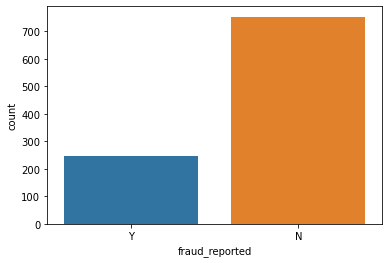

In [6]:
sns.countplot(x="fraud_reported", data=df)

In [7]:
for cols in df.columns:
    if df[cols].dtypes =='object':
        print("Column Name is {} and  no of Unique values are {}".format(cols, len(df[cols].value_counts())))
        print()

Column Name is policy_state and  no of Unique values are 3

Column Name is policy_csl and  no of Unique values are 3

Column Name is insured_sex and  no of Unique values are 2

Column Name is insured_education_level and  no of Unique values are 7

Column Name is insured_occupation and  no of Unique values are 14

Column Name is insured_hobbies and  no of Unique values are 20

Column Name is insured_relationship and  no of Unique values are 6

Column Name is incident_type and  no of Unique values are 4

Column Name is collision_type and  no of Unique values are 4

Column Name is incident_severity and  no of Unique values are 4

Column Name is authorities_contacted and  no of Unique values are 5

Column Name is incident_state and  no of Unique values are 7

Column Name is incident_city and  no of Unique values are 7

Column Name is incident_location and  no of Unique values are 1000

Column Name is property_damage and  no of Unique values are 3

Column Name is police_report_available and

In [8]:
for col in df.columns:
    if df[col].dtype=="object":
        print(df[col].value_counts())
        print()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64

machine-op-inspct    93
prof-specialty       85
tech-support         78
exec-managerial      76
sales                76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumpi

In [9]:
categorical=df.select_dtypes(include=['object']).keys()
categorical

Index(['policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'fraud_reported'],
      dtype='object')

In [10]:
numerical=df.select_dtypes(include=['int64']).keys()
numerical

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year'],
      dtype='object')

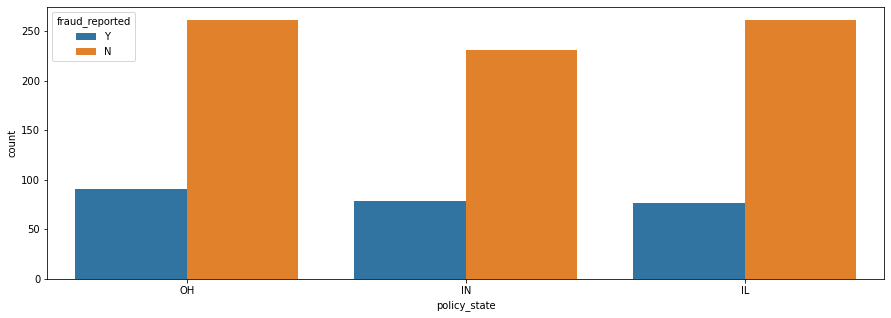

In [11]:
plt.figure(figsize=(15,5))
sns.countplot('policy_state', hue='fraud_reported',data=df)

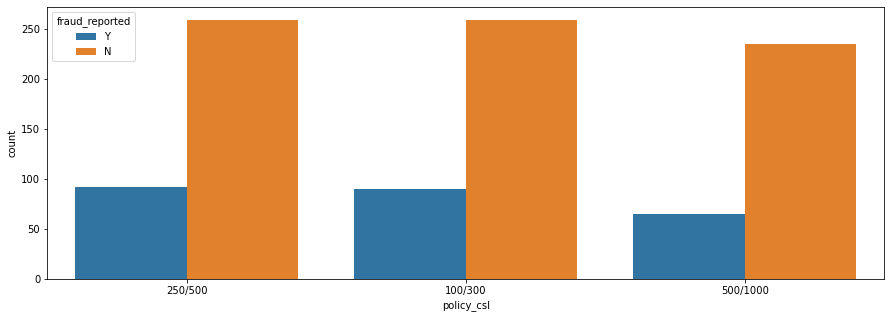

In [12]:
plt.figure(figsize=(15,5))
sns.countplot('policy_csl', hue='fraud_reported',data=df)

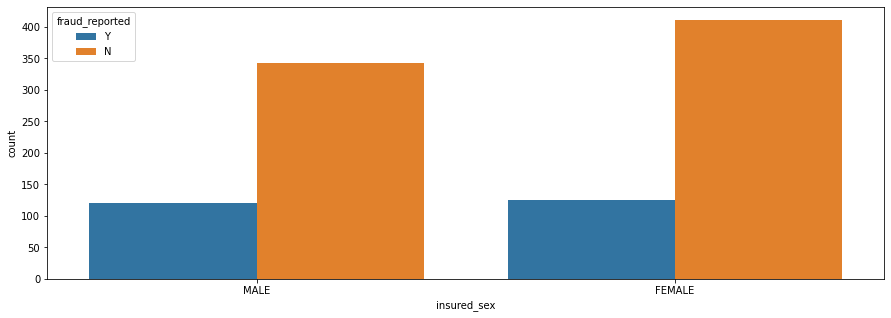

In [13]:
plt.figure(figsize=(15,5))
sns.countplot('insured_sex', hue='fraud_reported',data=df)

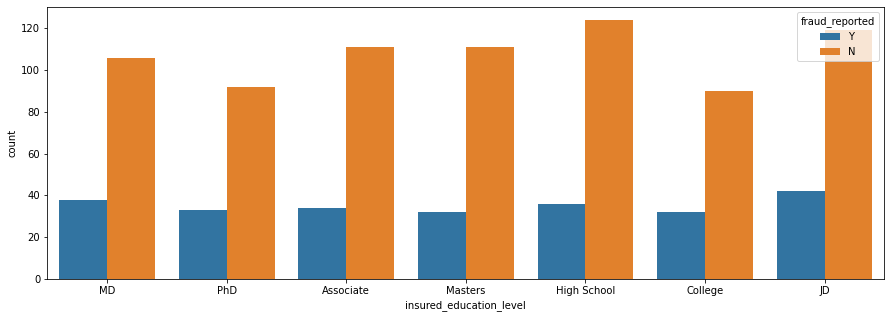

In [14]:
plt.figure(figsize=(15,5))
sns.countplot('insured_education_level', hue='fraud_reported',data=df)

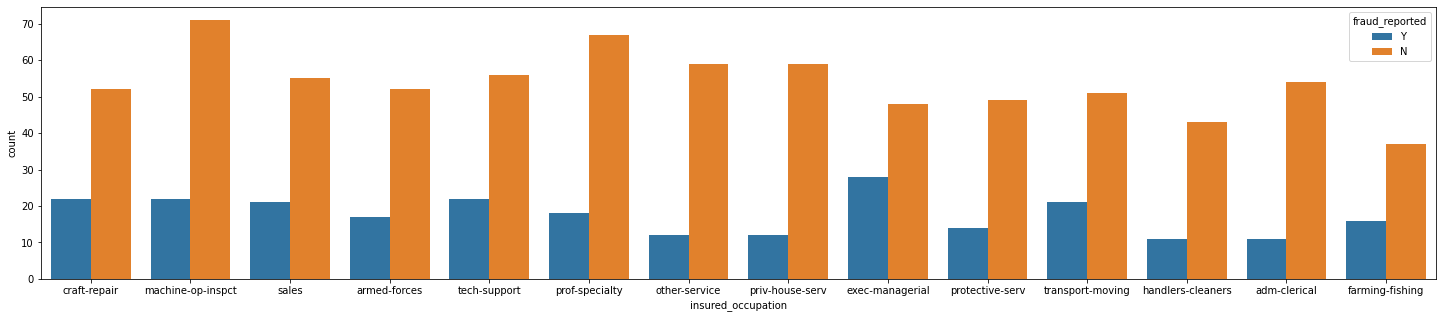

In [15]:
plt.figure(figsize=(25,5))
sns.countplot('insured_occupation', hue='fraud_reported',data=df)

In [16]:
# more frauds reported as yes from Exec Management

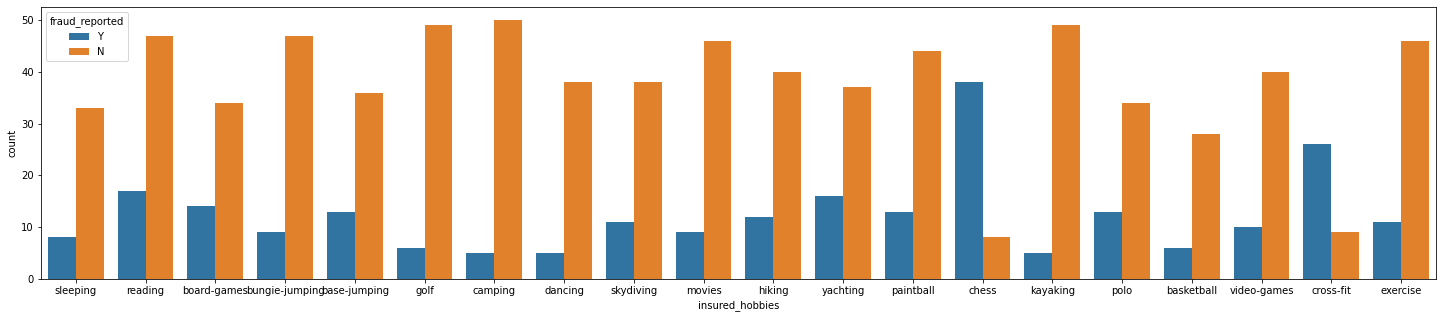

In [17]:
plt.figure(figsize=(25,5))
sns.countplot('insured_hobbies', hue='fraud_reported',data=df)

In [18]:
# people who play chess and crossfit their frauds are more in number. Very interesting

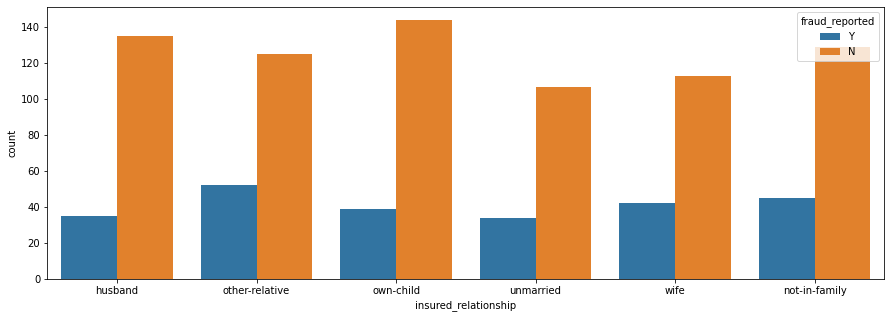

In [19]:
plt.figure(figsize=(15,5))
sns.countplot('insured_relationship', hue='fraud_reported',data=df)

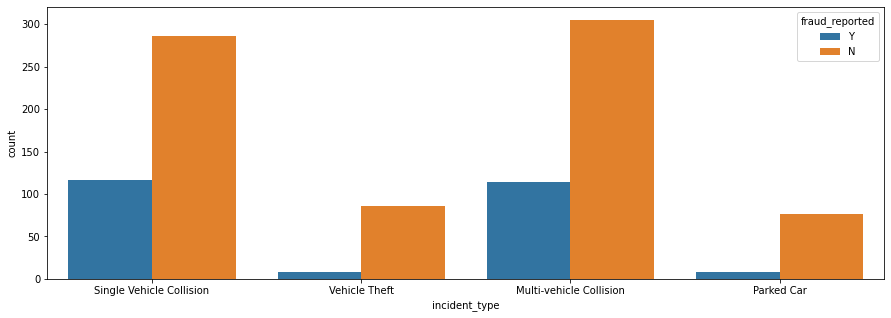

In [20]:
plt.figure(figsize=(15,5))
sns.countplot('incident_type', hue='fraud_reported',data=df)

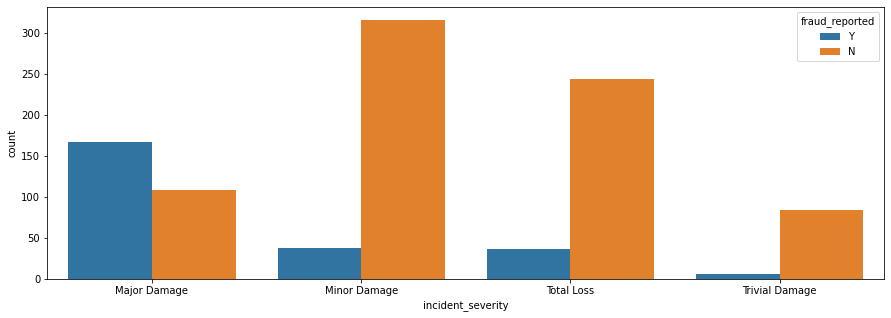

In [21]:
plt.figure(figsize=(15,5))
sns.countplot('incident_severity', hue='fraud_reported',data=df)

In [22]:
# More frauds in major damage

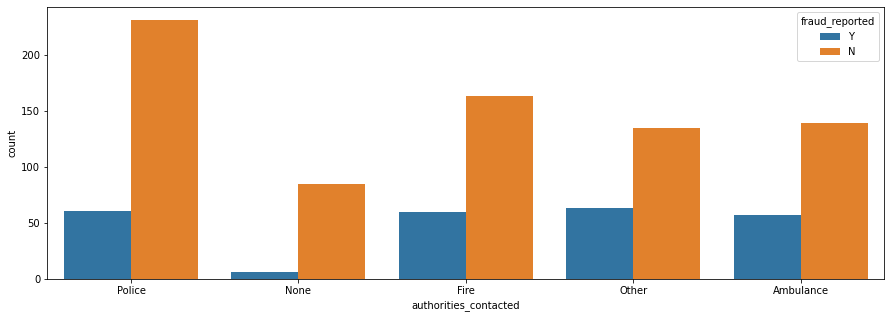

In [23]:
plt.figure(figsize=(15,5))
sns.countplot('authorities_contacted', hue='fraud_reported',data=df)

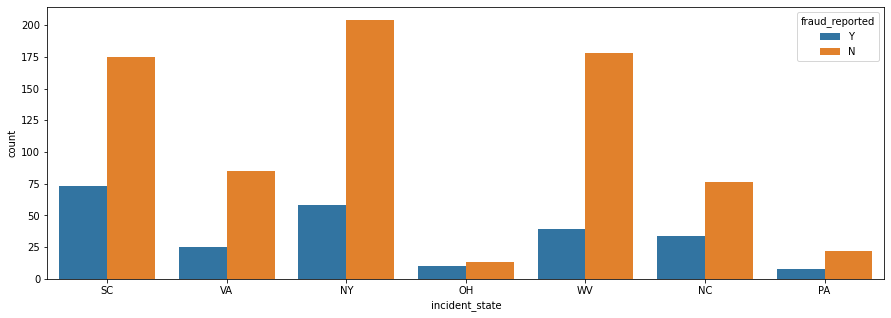

In [24]:
plt.figure(figsize=(15,5))
sns.countplot('incident_state', hue='fraud_reported',data=df)

In [25]:
df.replace('?',np.NaN,inplace=True)

In [26]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [27]:
# let us impute the missing values with mode of the feature
df['collision_type'].fillna(df['collision_type'].value_counts().index[0], inplace = True)
df['property_damage'].fillna(df['property_damage'].value_counts().index[0], inplace = True)
df['police_report_available'].fillna(df['police_report_available'].value_counts().index[0], inplace = True)

In [28]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [29]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [30]:
age_fraud = pd.crosstab(df['age_bins'], df['fraud_reported'])

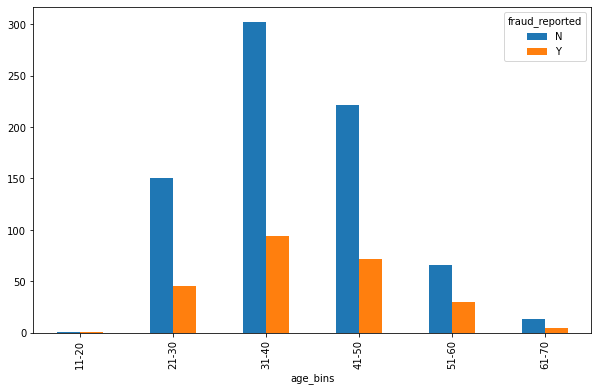

In [31]:
age_fraud.plot(kind = 'bar', figsize = (10,6))

In [32]:
df['policy_premium_bins'] = pd.cut(df.policy_annual_premium, bins = [0, 500, 1000, 1500, 2000], include_lowest = True, labels = ['0-500','501-1000','1001-1500','1501-2000'])

In [33]:
policy_premium_fraud = pd.crosstab(df.policy_premium_bins, df.fraud_reported)

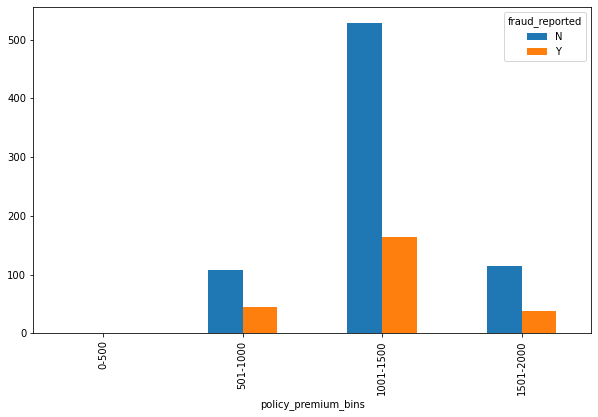

In [34]:
policy_premium_fraud.plot(kind = 'bar', figsize = (10,6))

In [35]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_number                           int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_date                  datetime64[ns]
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted             

In [36]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,age_bins,policy_premium_bins
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,Y,41-50,1001-1500
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,5070,780,780,3510,Mercedes,E400,2007,Y,41-50,1001-1500
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,N,21-30,1001-1500
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,41-50,1001-1500
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,6500,1300,650,4550,Accura,RSX,2009,N,41-50,1501-2000


In [37]:
df.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim','age_bins', 'policy_premium_bins'], axis = 1, inplace = True)

In [38]:
df_code = df[['policy_state','insured_sex', 'collision_type', 'incident_severity', 'police_report_available']]

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
enc=OneHotEncoder(sparse = False)

In [41]:
enc.fit(df_code)

OneHotEncoder(sparse=False)

In [42]:
df_coded = enc.transform(df_code)

In [43]:
columns = ['OH', 'IN', 'IL', 
                                'Insured_Male', 'Insured_Female',
                                'Side_Collison','Rear _Collison','Front Collison',
                                'Major Damage','Minor Damage','Total Loss','Trivial Damage'
                                'Police Report available', 'Police report not available']

In [44]:
df2= pd.DataFrame(df_coded, columns = ['OH', 'IN', 'IL', 'Insured_Male', 'Insured_Female', 'Side_Collison','Rear _Collison','Front Collison', 'Major Damage','Minor Damage','Total Loss','Trivial Damage', 'Police Report available', 'Police report not available'])

In [45]:
df= pd.concat([df, df2], axis = 1)

In [46]:
df

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,521585,OH,1000,1406.91,0,MALE,53300,0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,342868,IN,2000,1197.22,5000000,MALE,0,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,687698,OH,2000,1413.14,5000000,FEMALE,35100,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,227811,IL,2000,1415.74,6000000,FEMALE,48900,-62400,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,367455,IL,1000,1583.91,6000000,MALE,66000,-46000,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,1000,1310.80,0,FEMALE,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
996,285,41,186934,IL,1000,1436.79,0,FEMALE,70900,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
997,130,34,918516,OH,500,1383.49,3000000,FEMALE,35100,0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
998,458,62,533940,IL,2000,1356.92,5000000,MALE,0,0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [47]:
df.drop(['policy_state','insured_sex','collision_type', 'incident_severity','police_report_available'], axis = 1, inplace = True)

In [48]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
capital-gains                    int64
capital-loss                     int64
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
auto_make                       object
auto_model                      object
auto_year                        int64
fraud_reported                  object
OH                             float64
IN                             float64
IL                             float64
Insured_Male                   float64
Insured_Female                 float64
Side_Collison                  float64
Rear _Collison                 float64
Front Collison           

In [49]:
df.drop(['incident_location','auto_make','auto_model'],axis=1,inplace=True)


In [50]:
df['fraud_reported']=df['fraud_reported'].replace({'Y':1,'N':0})

In [51]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [52]:
x

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,Insured_Female,Side_Collison,Rear _Collison,Front Collison,Major Damage,Minor Damage,Total Loss,Trivial Damage,Police Report available,Police report not available
0,328,48,521585,1000,1406.91,0,53300,0,5,1,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,228,42,342868,2000,1197.22,5000000,0,0,8,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,134,29,687698,2000,1413.14,5000000,35100,0,7,3,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,256,41,227811,2000,1415.74,6000000,48900,-62400,5,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,228,44,367455,1000,1583.91,6000000,66000,-46000,20,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,0,0,20,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
996,285,41,186934,1000,1436.79,0,70900,0,23,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
997,130,34,918516,500,1383.49,3000000,35100,0,4,3,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
998,458,62,533940,2000,1356.92,5000000,0,0,2,1,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [53]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

In [67]:
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 42,test_size=0.33)
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))
print("AUC_ROC=", roc_auc_score(y_test,y_pred))

Accuracy Score =  0.6727272727272727
AUC_ROC= 0.5960743801652894


In [56]:
f1_score(y_test,y_pred, average='weighted')

0.6520728922402561

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score
def max_auc_roc_score(algo,x,y):
    max_auc_roc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20)
        algo.fit(x_train,y_train)
        y_pred = algo.predict(x_test)
        aucroc_scr=roc_auc_score(y_test,y_pred)
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_auc_roc_score:
            max_auc_roc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_auc_roc_score)
    print("Accuracy is=",accuracy_score(y_test,y_pred))
    print("F1 Score= ",f1_score(y_test,y_pred))
    return final_r_state

In [58]:
max_auc_roc_score(dtc,x,y)

auc roc score corresponding to  42  is  0.5918495297805642
auc roc score corresponding to  43  is  0.608830109224898
auc roc score corresponding to  44  is  0.595118898623279
auc roc score corresponding to  45  is  0.5335856196783348
auc roc score corresponding to  46  is  0.5597689231225005
auc roc score corresponding to  47  is  0.6423751686909581
auc roc score corresponding to  48  is  0.6169379144062688
auc roc score corresponding to  49  is  0.6267832489645652
auc roc score corresponding to  50  is  0.5996415770609319
auc roc score corresponding to  51  is  0.6294178794178794
auc roc score corresponding to  52  is  0.5885872066267832
auc roc score corresponding to  53  is  0.6407523510971787
auc roc score corresponding to  54  is  0.6214633504408474
auc roc score corresponding to  55  is  0.6344041162564316
auc roc score corresponding to  56  is  0.5559006211180124
auc roc score corresponding to  57  is  0.5824454591577879
auc roc score corresponding to  58  is  0.5548245614035087

64

In [59]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
max_auc_roc_score(lr,x,y)

auc roc score corresponding to  42  is  0.6457680250783698
auc roc score corresponding to  43  is  0.7045663903145151
auc roc score corresponding to  44  is  0.6924628007231262
auc roc score corresponding to  45  is  0.6753615353426139
auc roc score corresponding to  46  is  0.7270034069026812
auc roc score corresponding to  47  is  0.7002208317997791
auc roc score corresponding to  48  is  0.7136829415310428
auc roc score corresponding to  49  is  0.6861481822365394
auc roc score corresponding to  50  is  0.7021505376344086
auc roc score corresponding to  51  is  0.7117983367983367
auc roc score corresponding to  52  is  0.7270286853811935
auc roc score corresponding to  53  is  0.7141065830721003
auc roc score corresponding to  54  is  0.6877878668245822
auc roc score corresponding to  55  is  0.761159783062161
auc roc score corresponding to  56  is  0.7100508187464709
auc roc score corresponding to  57  is  0.7634449518011163
auc roc score corresponding to  58  is  0.655701754385964

65

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={"n_estimators":[10,100,500],'criterion' : ("gini", "entropy")}
rf=RandomForestClassifier()
gsv = GridSearchCV(rf, parameters, cv=5,scoring="roc_auc")
gsv.fit(x,y)
gsv.best_params_

{'criterion': 'gini', 'n_estimators': 100}

In [62]:
rf=RandomForestClassifier(criterion='gini',n_estimators=100)
max_auc_roc_score(rf,x,y)

auc roc score corresponding to  42  is  0.6457680250783698
auc roc score corresponding to  43  is  0.6356757468087906
auc roc score corresponding to  44  is  0.6523432067862607
auc roc score corresponding to  45  is  0.6648871469117449
auc roc score corresponding to  46  is  0.665679158643164
auc roc score corresponding to  47  is  0.668629615998037
auc roc score corresponding to  48  is  0.6653104279686559
auc roc score corresponding to  49  is  0.6676637521092192
auc roc score corresponding to  50  is  0.6896057347670251
auc roc score corresponding to  51  is  0.6642411642411643
auc roc score corresponding to  52  is  0.6876821598404664
auc roc score corresponding to  53  is  0.6686520376175549
auc roc score corresponding to  54  is  0.5863929464403211
auc roc score corresponding to  55  is  0.7177722152690864
auc roc score corresponding to  56  is  0.7111801242236024
auc roc score corresponding to  57  is  0.6547437848807712
auc roc score corresponding to  58  is  0.5904605263157895

65

In [70]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
max_auc_roc_score(svc,x,y)

auc roc score corresponding to  42  is  0.7410658307210031
auc roc score corresponding to  43  is  0.740163179365706
auc roc score corresponding to  44  is  0.7039354748991795
auc roc score corresponding to  45  is  0.7266522503040952
auc roc score corresponding to  46  is  0.749148274329729
auc roc score corresponding to  47  is  0.7686786897313213
auc roc score corresponding to  48  is  0.7216696805304401
auc roc score corresponding to  49  is  0.688909341923608
auc roc score corresponding to  50  is  0.7433691756272401
auc roc score corresponding to  51  is  0.7655925155925156
auc roc score corresponding to  52  is  0.8061052308636294
auc roc score corresponding to  53  is  0.7843260188087775
auc roc score corresponding to  54  is  0.7463482037110146
auc roc score corresponding to  55  is  0.8045473508552357
auc roc score corresponding to  56  is  0.7622811970638057
auc roc score corresponding to  57  is  0.8053018772196854
auc roc score corresponding to  58  is  0.7258771929824562


82

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
max_auc_roc_score(knn,x,y)

auc roc score corresponding to  42  is  0.613166144200627
auc roc score corresponding to  43  is  0.6331096196868008
auc roc score corresponding to  44  is  0.6645807259073842
auc roc score corresponding to  45  is  0.6819840518989053
auc roc score corresponding to  46  is  0.6519774848170642
auc roc score corresponding to  47  is  0.6369770580296896
auc roc score corresponding to  48  is  0.6184448462929476
auc roc score corresponding to  49  is  0.5767755790765455
auc roc score corresponding to  50  is  0.7057347670250896
auc roc score corresponding to  51  is  0.5906964656964657
auc roc score corresponding to  52  is  0.6329958582604694
auc roc score corresponding to  53  is  0.667398119122257
auc roc score corresponding to  54  is  0.6294907224634821
auc roc score corresponding to  55  is  0.6498400778751218
auc roc score corresponding to  56  is  0.677442123094297
auc roc score corresponding to  57  is  0.6718670725520041
auc roc score corresponding to  58  is  0.6414473684210527


50

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
max_auc_roc_score(gbc,x,y)

auc roc score corresponding to  42  is  0.6150470219435736
auc roc score corresponding to  43  is  0.6916699565732334
auc roc score corresponding to  44  is  0.6286330134890835
auc roc score corresponding to  45  is  0.6957696986079199
auc roc score corresponding to  46  is  0.7386313138794253
auc roc score corresponding to  47  is  0.6756226229910441
auc roc score corresponding to  48  is  0.6422543701024713
auc roc score corresponding to  49  is  0.6224114127933732
auc roc score corresponding to  50  is  0.6802867383512545
auc roc score corresponding to  51  is  0.7021829521829521
auc roc score corresponding to  52  is  0.6566191133609449
auc roc score corresponding to  53  is  0.6742946708463949
auc roc score corresponding to  54  is  0.6844321621265955
auc roc score corresponding to  55  is  0.6711166736198024
auc roc score corresponding to  56  is  0.6915584415584416
auc roc score corresponding to  57  is  0.6615930999492644
auc roc score corresponding to  58  is  0.60416666666666

82

In [66]:
from sklearn.ensemble import BaggingClassifier
bgc=BaggingClassifier()
max_auc_roc_score(bgc,x,y)

auc roc score corresponding to  42  is  0.6072100313479624
auc roc score corresponding to  43  is  0.6292275299381498
auc roc score corresponding to  44  is  0.5737727715199554
auc roc score corresponding to  45  is  0.6279226922557103
auc roc score corresponding to  46  is  0.6679010516960451
auc roc score corresponding to  47  is  0.6299840510366826
auc roc score corresponding to  48  is  0.6216094032549729
auc roc score corresponding to  49  is  0.6196502531063046
auc roc score corresponding to  50  is  0.6021505376344085
auc roc score corresponding to  51  is  0.6733367983367983
auc roc score corresponding to  52  is  0.6727258782021782
auc roc score corresponding to  53  is  0.6561128526645768
auc roc score corresponding to  54  is  0.6488353730754046
auc roc score corresponding to  55  is  0.5999165623696286
auc roc score corresponding to  56  is  0.6915584415584416
auc roc score corresponding to  57  is  0.6187214611872146
auc roc score corresponding to  58  is  0.57236842105263

96

In [72]:
# SVC is giving high accuracy and ROC score. Let us finalize it
x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = 82,test_size=0.2)
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
print('Accuracy Score = ', accuracy_score(y_test,y_pred))
print("AUC_ROC=", roc_auc_score(y_test,y_pred))
pd.crosstab(y_test,y_pred)

Accuracy Score =  0.885
AUC_ROC= 0.8474532224532224


col_0,0,1
fraud_reported,,
0,137,11
1,12,40


In [73]:
import joblib
joblib.dump(svc,'Auto_Insurance_fraud.pkl')

['Auto_Insurance_fraud.pkl']